In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_distribution

import matplotlib.pyplot as plt
import numpy as np

### Probability distribution:

c:\Users\marekowa\AppData\Local\miniconda3\envs\q4\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


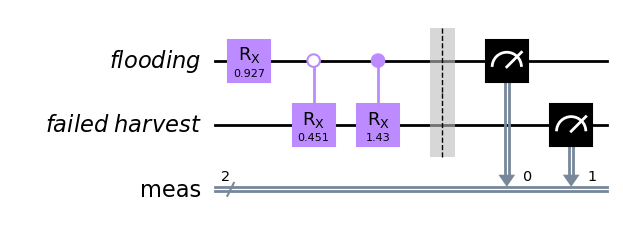

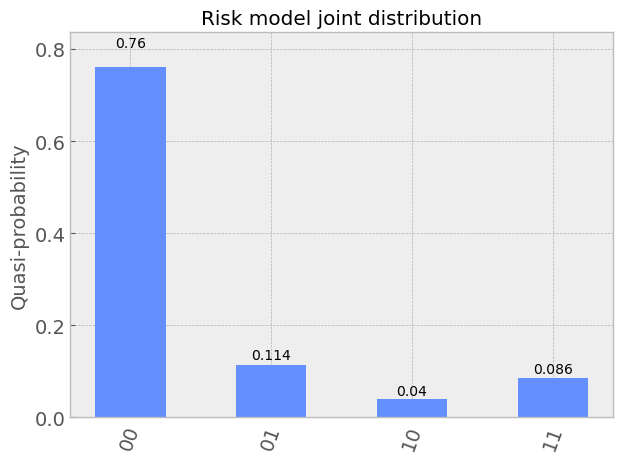

In [18]:
plt.style.use('ggplot')

flooding = QuantumRegister(1, name='flooding')
failed_h = QuantumRegister(1, name='failed harvest')

# Helper converter function
p_to_theta = lambda x: 2*np.arcsin(np.sqrt(x))

# Create the circuit
risk_model = QuantumCircuit(flooding, failed_h, name='Risk Model')

# Intrinsic not flooding
risk_model.rx(p_to_theta(0.2), flooding)


# The intrinsic probability for failed harvest occurs when there's no flooding
risk_model.crx(p_to_theta(0.05), flooding, failed_h, ctrl_state='0')

# Calculate the P(failed harvest | flooding)
p = 1 - (1 - 0.05) * (1 - 0.4)
risk_model.crx(p_to_theta(p), flooding, failed_h, ctrl_state='1')

# add the measurements:
risk_model.measure_all()

# Draw the circuit with matplotlib
display(risk_model.draw(output='mpl'))

sampler = Sampler()
job = sampler.run(risk_model, shots=None)
qp = job.result().quasi_dists[0].binary_probabilities()
    

with plt.style.context('bmh'):
    display(plot_distribution(qp, title='Risk model joint distribution'))

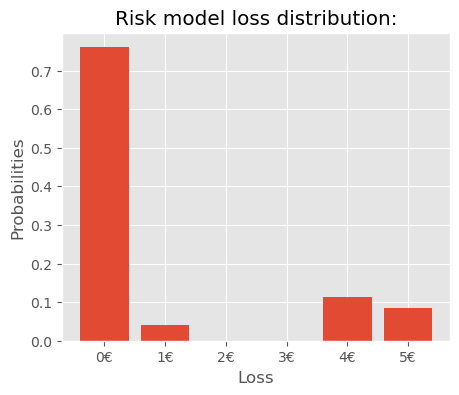

In [57]:
impacts = [1, 4]
n_events = len(impacts)

qps = list(qp.values())

occurencies = [format(i, f'0{n_events}b') for i in range(2**n_events)]
joint_impacts = [sum([impacts[impact_idx] if flag=='1' else 0 for impact_idx, flag in enumerate(occ)]) for occ in occurencies]
joint_impacts

plt.subplots(1,1, figsize=(5,4))

plt.bar(joint_impacts, qps)
plt.title('Risk model loss distribution:')
plt.xticks(range(6), [f'{x:.0f}€' for x in range(6)])
plt.xlabel("Loss")
plt.ylabel('Probabilities')

plt.show()

None

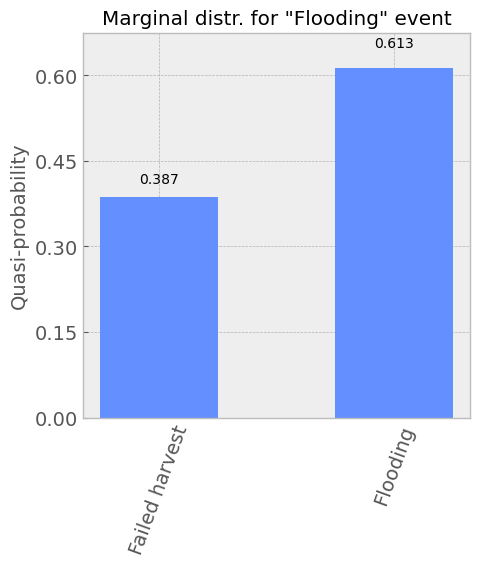

In [8]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    
    display(plot_distribution({'Flooding':qp['01']+qp['11'],
                               'Failed harvest':qp['10']+qp['11']}, 
                              ax=ax, 
                              title='Marginal distr. for "Flooding" event'))